# Geopandas Examples

## Basics

Import geopandas, matplotlib, and contextily

In [133]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

Geopandas has a few datasets included out-of-the-box

In [134]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Read New York City borough boundaries dataset

In [135]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


Project coordinates to WGS84 (https://epsg.io/3857)

In [136]:
nyc = nyc.to_crs(epsg=3857)
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-8243264.876 4948597.810, -824..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-8219461.955 4952778.645, -821..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-8222843.701 4950893.717, -822..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-8238858.850 4965914.966, -823..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-8226155.123 4982269.863, -822..."


Plot boundaries with contextily basemap

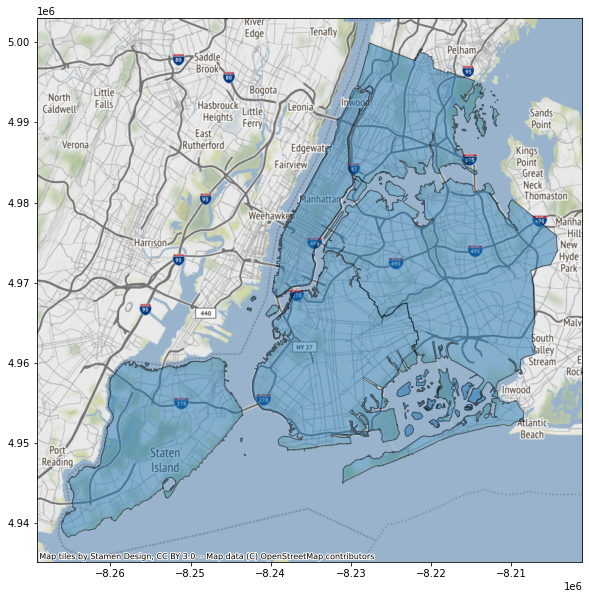

In [137]:
ax = nyc.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)
plt.show()

## NYC Modal Split by Census Tract

Read NYC 2010 Census Tract data (https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page)

In [138]:
# You can download and work with a local copy, or read it directly from the hosted source
#nyc_census_tracts = gpd.read_file("data/census_tracts.geojson")
nyc_census_tracts = gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Blocks_for_2010_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")
nyc_census_tracts.head()

,OBJECTID,CB2010,BoroCode,BoroName,CT2010,BCTCB2010,Shape__Area,Shape__Length,geometry
0,1,1000,5,Staten Island,000900,50009001000,244589.603897,2508.948115,"POLYGON ((-74.07921 40.64344, -74.07914 40.643..."
1,2,1000,5,Staten Island,002001,50020011000,111006.286819,1345.886422,"POLYGON ((-74.07062 40.61086, -74.07164 40.610..."
2,3,1000,5,Staten Island,002700,50027001000,150406.766022,1703.381172,"POLYGON ((-74.07525 40.62601, -74.07750 40.625..."
3,4,1000,5,Staten Island,004000,50040001000,141296.561142,1511.173743,"POLYGON ((-74.08709 40.61118, -74.08795 40.610..."
4,5,1000,5,Staten Island,006400,50064001000,200784.983597,1978.243852,"POLYGON ((-74.07644 40.60101, -74.07671 40.600..."


In [139]:
nyc_census_tracts = nyc_census_tracts.to_crs(epsg=3857)
nyc_census_tracts.head()

,OBJECTID,CB2010,BoroCode,BoroName,CT2010,BCTCB2010,Shape__Area,Shape__Length,geometry
0,1,1000,5,Staten Island,000900,50009001000,244589.603897,2508.948115,"POLYGON ((-8246459.628 4959890.409, -8246451.7..."
1,2,1000,5,Staten Island,002001,50020011000,111006.286819,1345.886422,"POLYGON ((-8245503.856 4955112.424, -8245616.9..."
2,3,1000,5,Staten Island,002700,50027001000,150406.766022,1703.381172,"POLYGON ((-8246018.610 4957334.417, -8246269.3..."
3,4,1000,5,Staten Island,004000,50040001000,141296.561142,1511.173743,"POLYGON ((-8247337.074 4955158.433, -8247432.5..."
4,5,1000,5,Staten Island,006400,50064001000,200784.983597,1978.243852,"POLYGON ((-8246151.459 4953667.644, -8246181.0..."


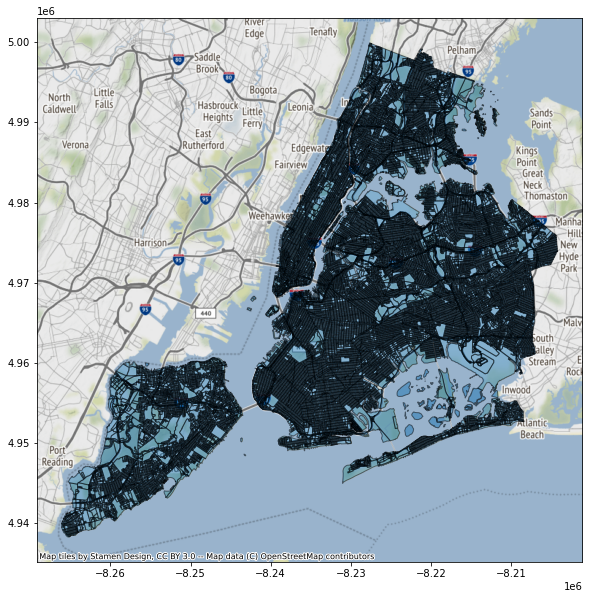

In [140]:
ax = nyc_census_tracts.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)
#plt.show()

Read a modal split dataset that was created from ACS 2019 5-year data (TODO: Add references on how to create this set)

In [141]:
modal_split_data = pd.read_csv(
    "data/NYC_Mode_Split_Veh_Occ_2019.csv",
    converters={'tract': lambda x: str(x)} # specify converter to keep leading zeros (TODO: fix in dataset eventually)
)
modal_split_data.head()

,county,tract,total_commute,auto,bus,subway_rail,taxi,walk_other,total_drive,veh_occ
0,New York,025500,2734,0.095,0.545,0.008,0.000,0.352,261,1.00
1,New York,022200,1257,0.093,0.728,0.021,0.029,0.129,117,2.46
2,New York,001001,715,0.109,0.587,0.010,0.024,0.270,78,1.03
3,New York,000700,6515,0.017,0.622,0.019,0.018,0.324,113,1.00
4,New York,010300,1394,0.038,0.404,0.070,0.078,0.410,53,1.09


Join NYC Census tract dataset and modal split dataset on the census tract column

In [142]:
modal_split_data_tracts = nyc_census_tracts.join(
    modal_split_data.set_index('tract'),
    on='CT2010'
)
modal_split_data_tracts.head()

,OBJECTID,CB2010,BoroCode,BoroName,CT2010,BCTCB2010,Shape__Area,Shape__Length,geometry,county,total_commute,auto,bus,subway_rail,taxi,walk_other,total_drive,veh_occ
0,1,1000,5,Staten Island,000900,50009001000,244589.603897,2508.948115,"POLYGON ((-8246459.628 4959890.409, -8246451.7...",New York,1125,0.066,0.636,0.004,0.019,0.275,74,1.06
0,1,1000,5,Staten Island,000900,50009001000,244589.603897,2508.948115,"POLYGON ((-8246459.628 4959890.409, -8246451.7...",Kings,2796,0.031,0.780,0.018,0.021,0.150,86,1.00
0,1,1000,5,Staten Island,000900,50009001000,244589.603897,2508.948115,"POLYGON ((-8246459.628 4959890.409, -8246451.7...",Richmond,609,0.255,0.300,0.000,0.003,0.442,155,1.08
1,2,1000,5,Staten Island,002001,50020011000,111006.286819,1345.886422,"POLYGON ((-8245503.856 4955112.424, -8245616.9...",Richmond,1304,0.533,0.410,0.023,0.000,0.034,695,1.09
2,3,1000,5,Staten Island,002700,50027001000,150406.766022,1703.381172,"POLYGON ((-8246018.610 4957334.417, -8246269.3...",New York,555,0.016,0.643,0.020,0.000,0.321,9,3.00


Plot the data and apply a color map on the auto share column

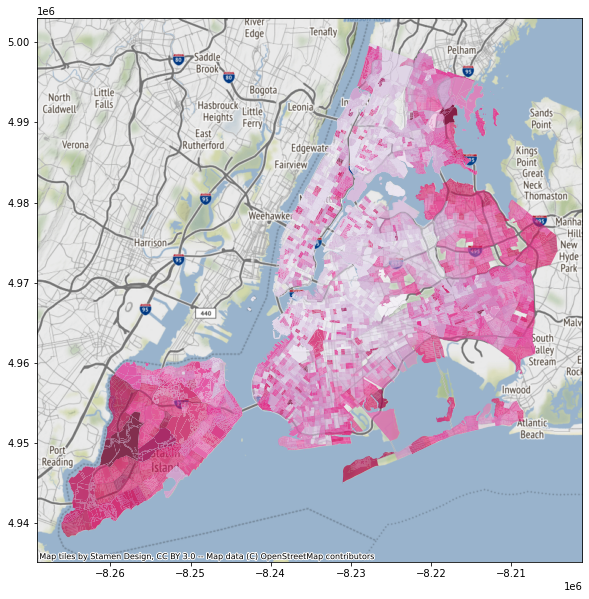

In [148]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
modal_split_data_tracts.plot(ax=ax, column='auto', cmap='PuRd', alpha=0.75)
ctx.add_basemap(ax)
#plt.show()

In [149]:
#nyc_subways = gpd.read_file("data/nyc_subways.geojson")
nyc_subways = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/3qz8-muuu?method=export&format=GeoJSON")
nyc_subways = nyc_subways.to_crs(epsg=3857)
nyc_subways.head()

,name,url,rt_symbol,objectid,id,shape_len,geometry
0,G,http://web.mta.info/nyct/service/,G,753,2000393,2438.20024902,"LINESTRING (-8237071.834 4965285.580, -8237004..."
1,G,http://web.mta.info/nyct/service/,G,754,2000394,3872.83441063,"LINESTRING (-8235368.666 4962310.184, -8235377..."
2,Q,http://web.mta.info/nyct/service/,N,755,2000469,1843.36633108,"LINESTRING (-8234954.663 4949997.756, -8235031..."
3,M,http://web.mta.info/nyct/service/,B,756,2000294,1919.5592029,"LINESTRING (-8229198.018 4975873.004, -8229187..."
4,M,http://web.mta.info/nyct/service/,B,757,2000296,2385.69853589,"LINESTRING (-8228007.267 4976443.278, -8227517..."


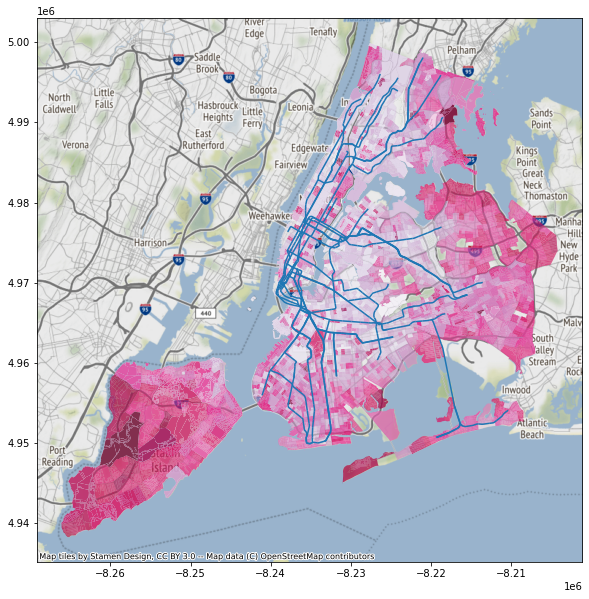

<Figure size 432x288 with 0 Axes>

In [150]:
nyc_subways.plot(ax=ax)
#plt.show()
#ctx.add_basemap(ax)
figure

In [151]:
from zipfile import ZipFile
from io import StringIO

def zipToDataframes(file_path):
    with ZipFile(file_path) as zip:
        dataframes = {}
        for file in zip.filelist:
            file_name = file.filename
            with zip.open(file_name) as f:
                bytes = f.read()
                s = str(bytes, 'utf-8')
                data = StringIO(s)
                df = pd.read_csv(data)
                name = file_name.split('.txt')[0]
                dataframes[name] = df
        return dataframes
    
gtfs_dataframes = zipToDataframes('data/gtfs.zip')
shapes = gtfs_dataframes['shapes']
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1..N03R,40.702068,-74.013664,0,NaN
1,1..N03R,40.703199,-74.014792,1,NaN
2,1..N03R,40.703226,-74.014820,2,NaN
3,1..N03R,40.703253,-74.014846,3,NaN
4,1..N03R,40.703280,-74.014870,4,NaN
